In [1]:
from lumpyrem import lumprem

model_list = []

a = lumprem.Model('lm1','silofile.txt')
b = lumprem.Model('lm2','silofile.txt')
c = lumprem.Model('lm3','silofile.txt')

model_list = [a,b,c]
model_name_list =[]
count=0
for i in model_list:
    model_name_list.append(model_list[count].lumprem_model_name)
    count+=1
model_name_list

['lm1', 'lm2', 'lm3']

In [2]:
d = lumprem.Simulation(model_list)
d.write_simulation()

Enter name of LUMPREP control file:  
 - reading file lumprep.in...
 
 START_DATE                  = 01/01/2000
 END_DATE                    = 31/12/2010
 NDAY_OUT                    = monthly
 STEPS_PER_DAY               = 5
 SILOFILE                    = silofile.txt
 EVAPCOLSTRING               = "evap"
 - reading file silofile.txt...
 - file silofile.txt read ok
 RAINFILE                    = rain.dat
 - writing file rain.dat...
 - file rain.dat written ok
 EPOTFILE                    = epot.dat
 - writing file epot.dat...
 - file epot.dat written ok
 CROPFAC                     = 0.2000000
 GAMMA                       = 1.500000
 IRRIGCODE                   = 1
 GWIRRIGFRAC                 = 1.000000
 MAXVOL                      = 0.5000000
 IRRIGVOLFRAC                = 0.5000000
 LUMPREM_MODEL_NAME          = "lm1"
 - writing file lr_lm1.in...
 - file lr_lm1.in written ok
 - writing file lr_lm1.tpl...
 - file lr_lm1.tpl written ok
 SILOFILE                    = silofile.txt
 EVA

In [3]:
d.run_simulation()

Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_lm1.in read ok.
 - file lr_lm1.out written ok.

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_lm2.in read ok.
 - file lr_lm2.out written ok.

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_lm3.in read ok.
 - file lr_lm3.out written ok.



In [4]:
d.model_names

['lm1', 'lm2', 'lm3']

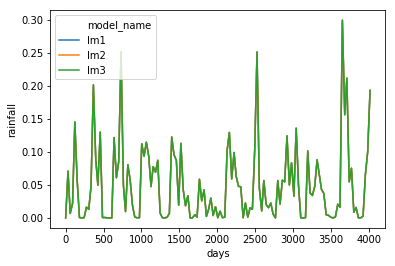

In [8]:
df = d.get_results()
df['model_name']

import seaborn as sb

sb.lineplot(data=df, x='days', y='rainfall', hue='model_name');